# Act Report


## Introduction

This is a data analysis project involving the WeRateDogs (@dog_rates) twitter account. We shall see how to gather and analyze tweets from the account. Data wrangling is a data analysis process that involves gathering data from different sources, assessing and cleaning the data for further processing. 

Python offers some powerful tools to make the job easier for analysts. Notable among them are the Numpy and Pandas libraries. 
To fetch data from a twitter account, one needs to apply for a developer account. The process requires twitter management to consider your application.

The entire process might take up to one week or more. 
In this article, we shall see the process of wrangling data, assuming that the tweet data we needed was already made available.

After the data wrangling process, we shall store the cleaned data in a file. I will go as brief as posible. For the full source code, check out thie [notebook](#). 

In [1]:
# Required Libraries
# importing all necessary packages or libraries
import requests
import pandas as pd
import numpy as np
import seaborn as sb
import re
import os
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
%matplotlib inline

The dataset for this project was already provided incsv format, so we load it to a pandas dataframe:

In [2]:
df_arc_tw = pd.read_csv('twitter-archive-enhanced.csv')
df_arc_tw.head(3)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   

   rating_denominator     name doggo floofer pupper puppo  
0                  10  Phineas  None    None   None  None  
1                  10    Tilly  None    None   None  None  
2                  10   Archie  None    None   None  None

The other file 'image_predictions.tsv' was fetched with the request library

In [5]:
# accessing the provided url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

# the output "<Response [200]>" indicates that the request was succesful
# creating a file name from he provided url, and writing the accessed content to the newly created file
with open(url.split('/')[-1], mode='wb') as img_data:
    img_data.write(response.content)

Finally, the third file was loaded to the pandas dataframe

In [6]:
twt_jsn = []
with open('tweet_json.txt', 'r') as file:
    # Reading each of the lines of the txt file
    for line in file:
        # Processing each of the lines to a json file object
        twts = json.loads(line)
        tweet_id = twts['id']
        retweet_count = twts['retweet_count']
        favorite_count = twts['favorite_count']
        # Appending each json object to our empty list
        twt_jsn.append({'tweet_id': tweet_id,
                        'retweet_count': retweet_count,
                        'favorite_count': favorite_count})

twt_jsn = pd.DataFrame(twt_jsn)
twt_jsn.head(2)

tweet_id  retweet_count  favorite_count
0  892420643555336193           8853           39467
1  892177421306343426           6514           33819

## Accessing The Datasets
The datasets were loaded to a pandas dataframe one by one. Afterwards, visual and programmatic assessments were performed on them to identify quality and tidiness issues

### Notable Issues Observed
#### Quality issues:

1. For better analysis, timestamp and retweeted_status_timestamp columns should be in datetime format instead of string.

2. The column, text, includes url

3. Some columns are in the wrong datatype 

4. According the img prediction algorithm, Not all are dogs

5. dog stage columns are in wrong datatype

6. wrongly extracted rating values at index 1165

7. Some rows contain invalid names (lower case alphabets, etc)

8. Some rows contain retweets instead of original post.


#### Tidiness Issues
1. The dog stage names formed their own columns
2. The three datasets contain related information but form different tables


### Cleaning the Dataset
Some helpful functions were defined to help clean the tables, in addition to other procedural programming efforts using pandas and python functions.

### Analysis & Visualization
The following questions were analysed:
- **What is the distribution of the dog stages?**
- **Which dog stage tends to get higher ratings?**
- **Does Favorite count (Likes) correlate with Retweets?**


### Results
It was observed that 

- There pupper dog stage significantly outnumbered other dog stages analysed
- The pupper dog stage also tends to get higher ratings
- Retweet_count correlates strongly with favorite_count. This means that dogs with high retweets also tend to get high likes

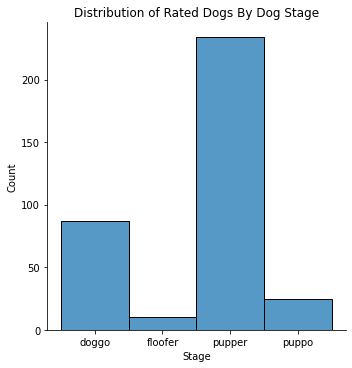

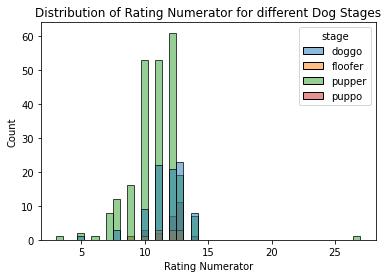

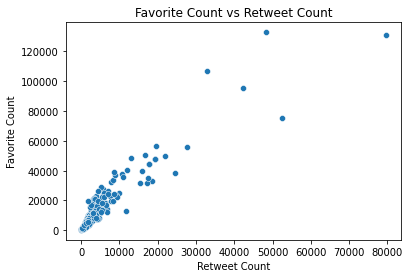

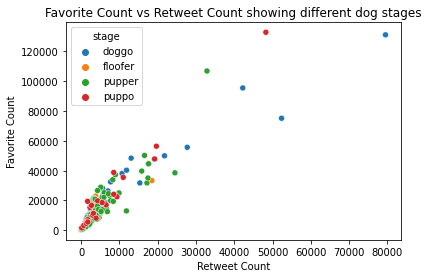